# Project 3: Maternal Mortality

In [31]:
# Import dependencies
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn.objects as so
import seaborn as sns
pd.set_option('max_colwidth', 400)

In [2]:
# Extract the csv. Data
maternal_mortality_df = pd.read_csv('VSRR_Provisional_Maternal_Death_Counts_and_Rates.csv')
maternal_mortality_df.head()

,Data As Of,Jurisdiction,Group,Subgroup,Year of Death,Month of Death,Time Period,Month Ending Date,Maternal Deaths,Live Births,Maternal Mortality Rate,Footnote
0,4/14/2024,United States,Total,Total,2019,1,12 month-ending,1/31/2019,660,"3,787,776",17.4,NaN
1,4/14/2024,United States,Total,Total,2019,2,12 month-ending,2/28/2019,653,"3,783,489",17.3,NaN
2,4/14/2024,United States,Total,Total,2019,3,12 month-ending,3/31/2019,657,"3,771,682",17.4,NaN
3,4/14/2024,United States,Total,Total,2019,4,12 month-ending,4/30/2019,668,"3,772,235",17.7,NaN
4,4/14/2024,United States,Total,Total,2019,5,12 month-ending,5/31/2019,706,"3,767,999",18.7,NaN


In [3]:
# look at brief summary of maternal_mortality DataFrame.
maternal_mortality_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Data As Of               600 non-null    object 
 1   Jurisdiction             600 non-null    object 
 2   Group                    600 non-null    object 
 3   Subgroup                 600 non-null    object 
 4   Year of Death            600 non-null    int64  
 5   Month of Death           600 non-null    int64  
 6   Time Period              600 non-null    object 
 7   Month Ending Date        600 non-null    object 
 8   Maternal Deaths          533 non-null    object 
 9   Live Births              600 non-null    object 
 10  Maternal Mortality Rate  494 non-null    float64
 11  Footnote                 106 non-null    object 
dtypes: float64(1), int64(2), object(9)
memory usage: 56.4+ KB


In [4]:
# Print out column names
df_columns = maternal_mortality_df.columns.to_list()
print(df_columns)

['Data As Of', 'Jurisdiction', 'Group', 'Subgroup', 'Year of Death', 'Month of Death', 'Time Period', 'Month Ending Date', 'Maternal Deaths', 'Live Births', 'Maternal Mortality Rate', 'Footnote']


In [5]:
# Get rid of columns we don't need
# 'Data As Of': Identical values under this column
# Jurisdiction: All data pertains to United States
# 'Group': 'Subgroup' contains more detailed info
# 'Year of Death': Redundant since we have 'Month Ending Date'
# 'Month of Death': Redundant since we have 'Month Ending Date'
maternal_mortality_df = maternal_mortality_df.drop(['Data As Of', 'Jurisdiction', 'Group', 'Year of Death', 'Month of Death', 'Time Period', "Footnote"], axis=1)
maternal_mortality_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Subgroup                 600 non-null    object 
 1   Month Ending Date        600 non-null    object 
 2   Maternal Deaths          533 non-null    object 
 3   Live Births              600 non-null    object 
 4   Maternal Mortality Rate  494 non-null    float64
dtypes: float64(1), object(4)
memory usage: 23.6+ KB


In [6]:
maternal_mortality_df['Maternal Deaths'] = maternal_mortality_df['Maternal Deaths'].str.replace(',', '').astype('Int64')
maternal_mortality_df['Live Births'] = maternal_mortality_df['Live Births'].str.replace(',', '').astype('Int64')
maternal_mortality_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Subgroup                 600 non-null    object 
 1   Month Ending Date        600 non-null    object 
 2   Maternal Deaths          533 non-null    Int64  
 3   Live Births              600 non-null    Int64  
 4   Maternal Mortality Rate  494 non-null    float64
dtypes: Int64(2), float64(1), object(2)
memory usage: 24.7+ KB


In [7]:
# We are only interested in analyzing rates among diff racial groups, and we will not look at age groups
# We will then extract specific racial groups from the data
maternal_mortality_df = maternal_mortality_df.rename(columns={'Subgroup':'Race'})

In [8]:
maternal_mortality_df.head()

,Race,Month Ending Date,Maternal Deaths,Live Births,Maternal Mortality Rate
0,Total,1/31/2019,660,3787776,17.4
1,Total,2/28/2019,653,3783489,17.3
2,Total,3/31/2019,657,3771682,17.4
3,Total,4/30/2019,668,3772235,17.7
4,Total,5/31/2019,706,3767999,18.7


In [9]:
# Change the '/' in 'Month Ending Date' to '-'
maternal_mortality_df["Month Ending Date"] = maternal_mortality_df["Month Ending Date"].str.replace(r'(/)','-', regex=True)

In [10]:
maternal_mortality_df.head()

,Race,Month Ending Date,Maternal Deaths,Live Births,Maternal Mortality Rate
0,Total,1-31-2019,660,3787776,17.4
1,Total,2-28-2019,653,3783489,17.3
2,Total,3-31-2019,657,3771682,17.4
3,Total,4-30-2019,668,3772235,17.7
4,Total,5-31-2019,706,3767999,18.7


In [11]:
# Change 'Month Ending Date' from String to Datetime data type
maternal_mortality_df["Month Ending Date"] = pd.to_datetime(maternal_mortality_df["Month Ending Date"])

In [12]:
maternal_mortality_df = maternal_mortality_df.rename(columns={'Month Ending Date': 'Date_m'})

In [13]:
maternal_mortality_df.head()

,Race,Date_m,Maternal Deaths,Live Births,Maternal Mortality Rate
0,Total,2019-01-31,660,3787776,17.4
1,Total,2019-02-28,653,3783489,17.3
2,Total,2019-03-31,657,3771682,17.4
3,Total,2019-04-30,668,3772235,17.7
4,Total,2019-05-31,706,3767999,18.7


In [14]:
maternal_mortality_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Race                     600 non-null    object        
 1   Date_m                   600 non-null    datetime64[ns]
 2   Maternal Deaths          533 non-null    Int64         
 3   Live Births              600 non-null    Int64         
 4   Maternal Mortality Rate  494 non-null    float64       
dtypes: Int64(2), datetime64[ns](1), float64(1), object(1)
memory usage: 24.7+ KB


In [15]:
# Change Column names so they are easier to work with in SQL 
maternal_mortality_df = maternal_mortality_df.rename(columns={'Year of Death': 'Year', 'Month of Death': 'Month', 'Maternal Deaths': 'Maternal_Deaths', 'Live Births': 'Live_Births', 'Maternal Mortality Rate': 'Maternal_Mortality_Rate'})

In [16]:
# Make a DataFrame/table for data of Hispanic mothers
p = '^Hispanic'
hispanic_df = maternal_mortality_df[maternal_mortality_df['Race'].str.contains(p)]
hispanic_index = np.arange(0, len(hispanic_df), 1)
# Create an index column called 'Hispanic_index' for the hispanic df (makes creating a table in SQL easier)
hispanic_df["Hispanic_index"] = hispanic_index
# Create a second index that is the same as 'Hispanic_index' but makes easier to connect tables in SQL
hispanic_df["Date_index"] = hispanic_index
hispanic_df = hispanic_df[['Hispanic_index', 'Date_index', 'Maternal_Deaths', 'Live_Births', 'Maternal_Mortality_Rate']]
hispanic_df.info()
hispanic_df.to_csv("Resources/hispanic.csv", encoding='utf8', index=False)

<class 'pandas.core.frame.DataFrame'>
Index: 60 entries, 240 to 299
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Hispanic_index           60 non-null     int32  
 1   Date_index               60 non-null     int32  
 2   Maternal_Deaths          60 non-null     Int64  
 3   Live_Births              60 non-null     Int64  
 4   Maternal_Mortality_Rate  60 non-null     float64
dtypes: Int64(2), float64(1), int32(2)
memory usage: 2.5 KB


C:\Users\solan\AppData\Local\Temp\ipykernel_9536\1739154843.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hispanic_df["Hispanic_index"] = hispanic_index
C:\Users\solan\AppData\Local\Temp\ipykernel_9536\1739154843.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hispanic_df["Date_index"] = hispanic_index


In [17]:
# Make a DataFrame/table for data of Native-American mothers
p = 'Indian'
native_indian_df = maternal_mortality_df[maternal_mortality_df['Race'].str.contains(p)]
native_indian_index = np.arange(0, len(native_indian_df), 1)
# Create an index column called 'Native_Indian_index' for the native_indian_df (makes creating a table in SQL easier)
native_indian_df["Native_Indian_index"] = native_indian_index
# Create a second index that is the same as 'Native_Indian_index' but makes easier to connect tables in SQL
native_indian_df["Date_index"] = native_indian_index
# Rearrange columns for Native Indian df
native_indian_df = native_indian_df[['Native_Indian_index', 'Date_index', 'Maternal_Deaths', 'Live_Births', 'Maternal_Mortality_Rate']]
native_indian_df.info()
native_indian_df.to_csv("Resources/native_indian.csv", encoding='utf8', index=False)

<class 'pandas.core.frame.DataFrame'>
Index: 60 entries, 300 to 359
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Native_Indian_index      60 non-null     int32  
 1   Date_index               60 non-null     int32  
 2   Maternal_Deaths          53 non-null     Int64  
 3   Live_Births              60 non-null     Int64  
 4   Maternal_Mortality_Rate  14 non-null     float64
dtypes: Int64(2), float64(1), int32(2)
memory usage: 2.5 KB


C:\Users\solan\AppData\Local\Temp\ipykernel_9536\3277984471.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  native_indian_df["Native_Indian_index"] = native_indian_index
C:\Users\solan\AppData\Local\Temp\ipykernel_9536\3277984471.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  native_indian_df["Date_index"] = native_indian_index


In [18]:
# Make a DataFrame/table for data of Black mothers
p = 'Black'
black_df = maternal_mortality_df[maternal_mortality_df['Race'].str.contains(p)]
black_index = np.arange(0, len(black_df), 1)
# Create an index column called 'Black_index' for the black_df (makes creating a table in SQL easier)
black_df["Black_index"] = black_index
# Create a second index that is the same as 'Black_index' but makes easier to connect tables in SQL
black_df["Date_index"] = black_index
black_df = black_df[['Black_index', 'Date_index', 'Maternal_Deaths', 'Live_Births', 'Maternal_Mortality_Rate']]
black_df.info()
black_df.to_csv("Resources/black.csv", encoding='utf8', index=False)

<class 'pandas.core.frame.DataFrame'>
Index: 60 entries, 420 to 479
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Black_index              60 non-null     int32  
 1   Date_index               60 non-null     int32  
 2   Maternal_Deaths          60 non-null     Int64  
 3   Live_Births              60 non-null     Int64  
 4   Maternal_Mortality_Rate  60 non-null     float64
dtypes: Int64(2), float64(1), int32(2)
memory usage: 2.5 KB


C:\Users\solan\AppData\Local\Temp\ipykernel_9536\444379422.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  black_df["Black_index"] = black_index
C:\Users\solan\AppData\Local\Temp\ipykernel_9536\444379422.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  black_df["Date_index"] = black_index


In [19]:
# Make a DataFrame/table for data of Asian mothers
p = 'Asian'
asian_df = maternal_mortality_df[maternal_mortality_df['Race'].str.contains(p)]
asian_index = np.arange(0, len(asian_df), 1)
## Create an index column called 'Asian_index' for the asian_df (makes creating a table in SQL easier)
asian_df["Asian_index"] = asian_index
# Create a second index that is the same as 'Asian_index' but makes easier to connect tables in SQL
asian_df["Date_index"] = asian_index
asian_df = asian_df[['Asian_index', 'Date_index', 'Maternal_Deaths', 'Live_Births', 'Maternal_Mortality_Rate']]
asian_df.info()
asian_df.to_csv("Resources/asian.csv", encoding='utf8', index=False)

<class 'pandas.core.frame.DataFrame'>
Index: 60 entries, 360 to 419
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Asian_index              60 non-null     int32  
 1   Date_index               60 non-null     int32  
 2   Maternal_Deaths          60 non-null     Int64  
 3   Live_Births              60 non-null     Int64  
 4   Maternal_Mortality_Rate  60 non-null     float64
dtypes: Int64(2), float64(1), int32(2)
memory usage: 2.5 KB


C:\Users\solan\AppData\Local\Temp\ipykernel_9536\3913352145.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  asian_df["Asian_index"] = asian_index
C:\Users\solan\AppData\Local\Temp\ipykernel_9536\3913352145.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  asian_df["Date_index"] = asian_index


In [20]:
# Make a DataFrame/table for data of Pacific Islander mothers
p = 'Hawaiian'
pacific_islander_df = maternal_mortality_df[maternal_mortality_df['Race'].str.contains(p)]
pacific_islander_index = np.arange(0, len(pacific_islander_df), 1)
# Create an index column called 'Pacific_index' for the pacific_islander_df (makes creating a table in SQL easier)
pacific_islander_df["Pacific_index"] = pacific_islander_index
# Create a second index that is the same as 'Pacific_index' but makes easier to connect tables in SQL
pacific_islander_df["Date_index"] = pacific_islander_index
pacific_islander_df = pacific_islander_df[['Pacific_index', 'Date_index', 'Maternal_Deaths', 'Live_Births', 'Maternal_Mortality_Rate']]
pacific_islander_df.info()
pacific_islander_df.to_csv("Resources/pacific_islander.csv", encoding='utf8', index=False)

<class 'pandas.core.frame.DataFrame'>
Index: 60 entries, 480 to 539
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Pacific_index            60 non-null     int32  
 1   Date_index               60 non-null     int32  
 2   Maternal_Deaths          0 non-null      Int64  
 3   Live_Births              60 non-null     Int64  
 4   Maternal_Mortality_Rate  0 non-null      float64
dtypes: Int64(2), float64(1), int32(2)
memory usage: 2.5 KB


C:\Users\solan\AppData\Local\Temp\ipykernel_9536\825562343.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pacific_islander_df["Pacific_index"] = pacific_islander_index
C:\Users\solan\AppData\Local\Temp\ipykernel_9536\825562343.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pacific_islander_df["Date_index"] = pacific_islander_index


In [21]:
# Make a DataFrame/table for data of White mothers
p = 'White'
white_df = maternal_mortality_df[maternal_mortality_df['Race'].str.contains(p)]
white_index = np.arange(0, len(white_df), 1)
# Create an index column called 'White_index' for the white_df (makes creating a table in SQL easier)
white_df["White_index"] = white_index
# Create a second index that is the same as 'White_index' but makes easier to connect tables in SQL
white_df["Date_index"] = white_index
white_df = white_df[['White_index', 'Date_index','Maternal_Deaths', 'Live_Births', 'Maternal_Mortality_Rate']]
white_df.info()
white_df.to_csv("Resources/white.csv", encoding='utf8', index=False)

<class 'pandas.core.frame.DataFrame'>
Index: 60 entries, 540 to 599
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   White_index              60 non-null     int32  
 1   Date_index               60 non-null     int32  
 2   Maternal_Deaths          60 non-null     Int64  
 3   Live_Births              60 non-null     Int64  
 4   Maternal_Mortality_Rate  60 non-null     float64
dtypes: Int64(2), float64(1), int32(2)
memory usage: 2.5 KB


C:\Users\solan\AppData\Local\Temp\ipykernel_9536\1746342725.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  white_df["White_index"] = white_index
C:\Users\solan\AppData\Local\Temp\ipykernel_9536\1746342725.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  white_df["Date_index"] = white_index


In [22]:
# Create a dates table consisting of a consecutive index column and the dates (for connecting tables in SQL)
index = np.arange(0, len(maternal_mortality_df["Date_m"].unique()), 1)
dates_df = pd.DataFrame(sorted(maternal_mortality_df["Date_m"].unique()), columns=['Date_m'])
dates_df["Date_index"] = index
dates_df = dates_df[['Date_index', 'Date_m']]
dates_df.info()
dates_df.to_csv("Resources/dates.csv", encoding='utf8', index=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date_index  60 non-null     int32         
 1   Date_m      60 non-null     datetime64[ns]
dtypes: datetime64[ns](1), int32(1)
memory usage: 852.0 bytes


In [29]:
mortality_df = maternal_mortality_df.iloc[240:]

C:\Users\solan\anaconda3\Lib\site-packages\seaborn\_core\plot.py:1284: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '<IntegerArray>
[ 90,  90,  89,  96, 103, 105, 100, 100,  96, 103,
 ...
 313, 305, 303, 290, 280, 276, 277, 268, 255, 263]
Length: 360, dtype: Int64' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  new_series.loc[idx] = view_scale(layer_df.loc[idx, var])
C:\Users\solan\anaconda3\Lib\site-packages\seaborn\_core\plot.py:1491: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context("mode.use_inf_as_na", True):


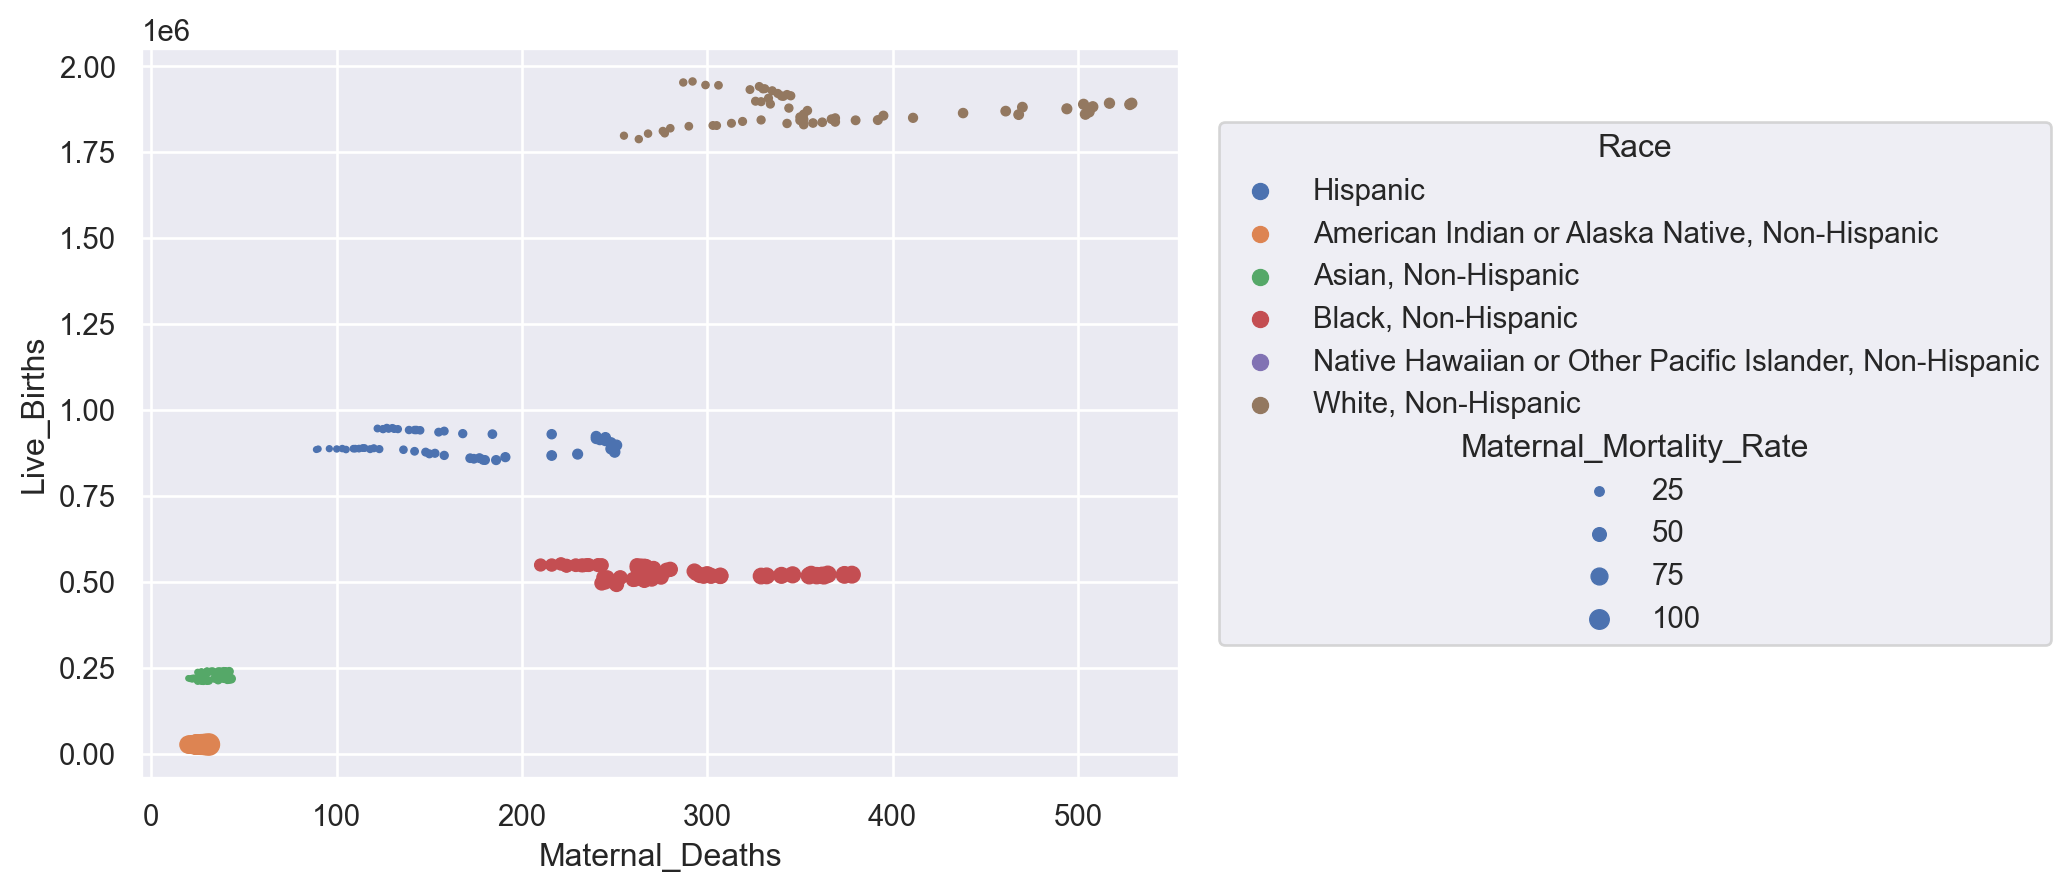

In [33]:
(
    so.Plot(mortality_df, x="Maternal_Deaths", y="Live_Births",
    color="Race", pointsize="Maternal_Mortality_Rate",)
    .add(so.Dot(), so.Agg())
)